<a href="https://colab.research.google.com/github/Mounish2023/fastaicourse/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/'/root/.fastai/data/oxford-iiit-pet/images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_37.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_190.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_119.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_58.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_98.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_232.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_149.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_24.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egypt

In [7]:
fname = (path/'/root/.fastai/data/oxford-iiit-pet/images').ls()[0]
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_37.jpg')

In [8]:
fname.name

'staffordshire_bull_terrier_37.jpg'

In [9]:
pattern = r'(.+)_\d+\.jpg'

In [10]:
import re
re.findall(pattern,fname.name)

['staffordshire_bull_terrier']

In [11]:
fnames = (path/'/root/.fastai/data/oxford-iiit-pet/images').ls()


In [12]:
all_names = []
for f in fnames:
  all_names.append(re.findall(pattern, f.name))

In [13]:
all_names[4]

['pomeranian']

In [14]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    item_tfms=Resize(460),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+\.jpg$'),'name'),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [15]:
dls = pets.dataloaders(path/'/root/.fastai/data/oxford-iiit-pet/images')

In [16]:
len(dls)

2

In [17]:
dls.bs

64

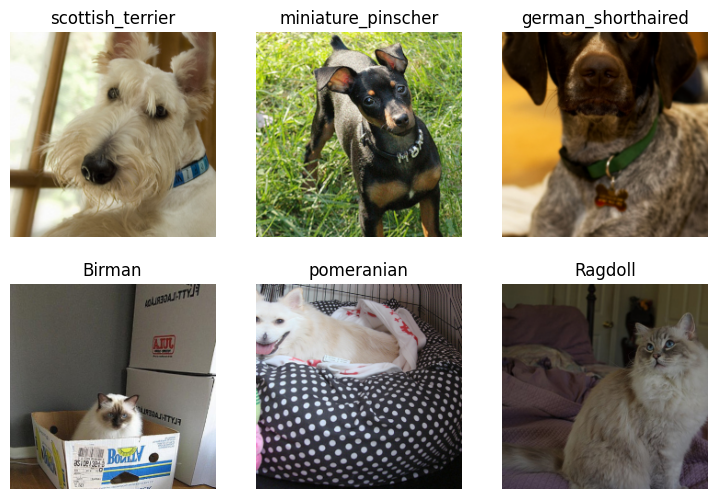

In [18]:
dls.train.show_batch(max_n=6,nrows=2)

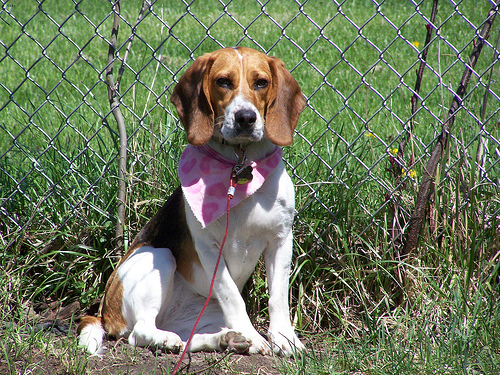

In [19]:
from PIL import Image

Image.open((path/'/root/.fastai/data/oxford-iiit-pet/images/beagle_25.jpg'))

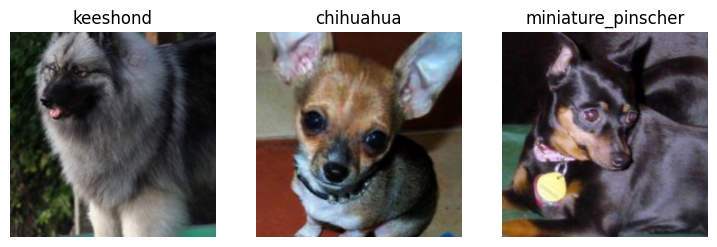

In [20]:
dls.show_batch(nrows=1, ncols=3)

In [21]:
pets.summary(path/'/root/.fastai/data/oxford-iiit-pet/images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_117.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x383
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_117.jpg
    applying partial gives
      Birman
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=500x383, TensorCategory(2))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: 

In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 169MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.516228,0.362380,0.117727,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.515188,0.306015,0.102842,01:03
1,0.325748,0.244115,0.079838,01:02


In [23]:
x,y = dls.one_batch()

In [24]:
y.shape

torch.Size([64])

In [25]:
x.shape

torch.Size([64, 3, 224, 224])

In [26]:
x[0]

TensorImage([[[-1.0409, -0.9880, -0.9826,  ..., -1.9235, -1.9260, -1.9354],
              [-1.0590, -1.0683, -1.0243,  ..., -1.9371, -1.9584, -1.9804],
              [-1.0684, -1.0766, -1.0244,  ..., -1.9565, -1.9805, -1.9621],
              ...,
              [-0.1860, -0.2961, -0.9044,  ..., -1.5292, -1.4917, -1.3881],
              [-1.0650, -0.9685, -0.9624,  ..., -1.4706, -1.5443, -1.5164],
              [-0.8593, -0.9486, -1.0846,  ..., -1.0203, -1.1837, -1.4747]],

             [[-1.4794, -1.4572, -1.4795,  ..., -1.7994, -1.8174, -1.8300],
              [-1.4900, -1.4761, -1.4474,  ..., -1.8159, -1.8529, -1.8748],
              [-1.4736, -1.4715, -1.4939,  ..., -1.8501, -1.8749, -1.8566],
              ...,
              [ 0.3404,  0.2414, -0.7894,  ..., -1.4081, -1.3916, -1.2099],
              [-0.9469, -0.7331, -0.8612,  ..., -1.2929, -1.4164, -1.3815],
              [-0.7791, -0.8643, -0.9835,  ..., -0.7209, -1.0048, -1.3763]],

             [[-1.7018, -1.7001, -1.7050,  ...

In [27]:
y

TensorCategory([13,  4,  9, 13, 32, 12,  1, 32, 23, 22, 33, 24, 36, 10, 34, 33,
                16, 23, 12,  8,  2,  0, 32, 25, 10, 24, 28, 22, 27, 36, 13, 14,
                23,  6, 18,  3, 34, 36, 16,  5, 17,  5, 32,  8, 10, 13, 28, 12,
                15,  7, 22, 33, 14, 21, 33, 27, 10, 28, 32, 29, 19, 16, 26, 14],
               device='cuda:0')

In [28]:
preds,_ = learn.get_preds(dl=[(x,y)])

In [29]:
preds[0]

tensor([1.2326e-07, 2.5004e-06, 6.0812e-08, 3.2059e-07, 2.1505e-07, 3.6578e-07,
        2.1252e-08, 6.3673e-08, 2.9105e-08, 2.1716e-07, 2.3331e-07, 4.1547e-07,
        9.1870e-05, 9.9802e-01, 2.5078e-06, 2.0477e-07, 5.4104e-06, 4.2456e-07,
        6.7471e-07, 3.9021e-08, 3.5864e-06, 6.9855e-08, 2.3009e-07, 2.6709e-08,
        3.1410e-07, 1.8095e-08, 6.9057e-05, 9.5821e-08, 4.6623e-08, 4.7503e-08,
        5.0214e-08, 3.2172e-08, 2.6469e-07, 6.5811e-07, 1.7949e-03, 3.2965e-07,
        2.8420e-07])

In [30]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

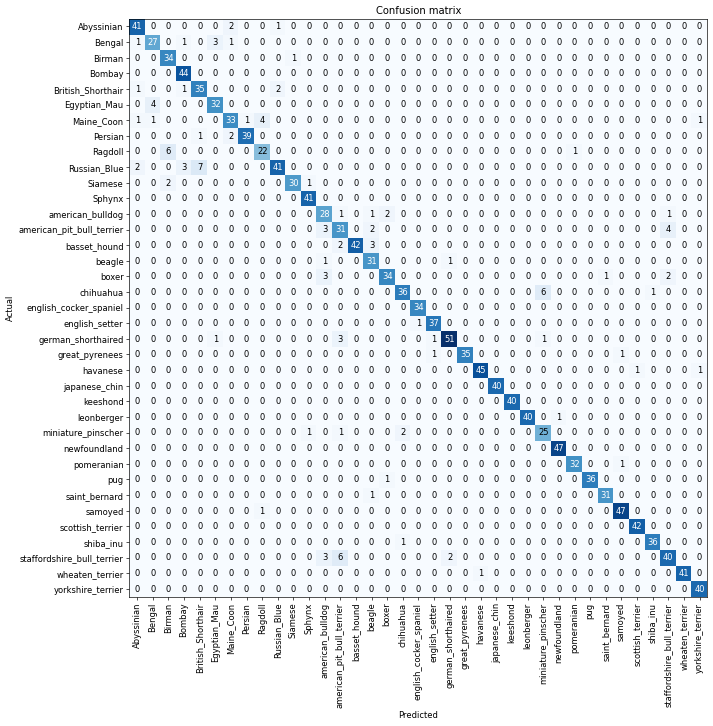

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [32]:
interp.most_confused(min_val=5)

[('Russian_Blue', 'British_Shorthair', np.int64(7)),
 ('Ragdoll', 'Birman', np.int64(6)),
 ('chihuahua', 'miniature_pinscher', np.int64(6)),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', np.int64(6))]